# Trained Weights

This notebook generates figure 7.3.

Provide `bert_2_bert_run_id_first` and `bert_2_bert_run_id_second` to create the images for two different runs.


In [1]:
from tooling.experiment import get_model
from tooling.config import DualModelStagedBERTConfig, StagedBERT
from tooling.config import Experiment, Transformation
from copy import deepcopy
from omegaconf import OmegaConf
import mlflow
from pathlib import Path
from classifiers.staged_bert.model import StagedBertForTokenClassification

In [2]:
bert_2_bert_run_id_first = "1a45a7a27e614f9da5c013652e7895d7"
bert_2_bert_run_id_second = "c1169f83c60e415a8eac31ce17e5d243"

savepath = Path("../src/temp/weights").expanduser()

In [3]:
dst_path = Path("../src/temp/weights/first/")
bert_2_bert_run = mlflow.get_run(bert_2_bert_run_id_first)
mlflow.artifacts.download_artifacts(
    f"{bert_2_bert_run.info.artifact_uri}/0_model",
    dst_path=dst_path,
)

'/Users/bockstaller/code/uvl-tore-classifier-bert/src/temp/weights/first/0_model'

Test


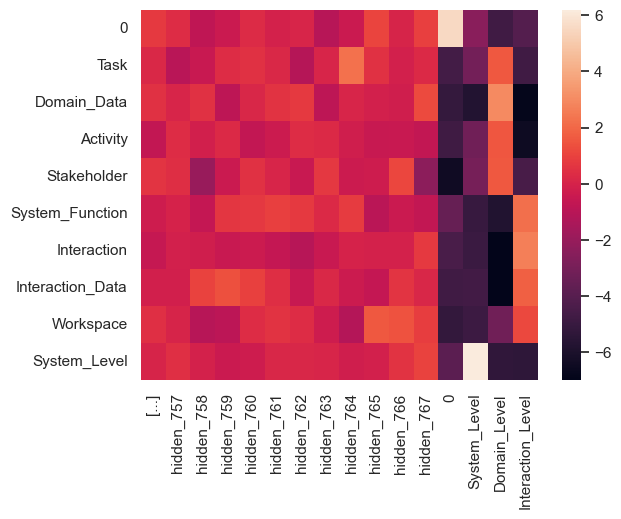

In [4]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="white")

model = StagedBertForTokenClassification.from_pretrained(
    pretrained_model_name_or_path=dst_path.joinpath("./0_model")
)

length = 16
length_onehot = 4
length_hidden = length - length_onehot

hidden_labels = [
    f"hidden_{idx}" for idx in range(772 - length, 772 - length_onehot)
]
hidden_labels[0] = "[...]"
onehot_labels = ["0", "System_Level", "Domain_Level", "Interaction_Level"]

x_labels = hidden_labels + onehot_labels
y_labels = [
    "0",
    "Task",
    "Domain_Data",
    "Activity",
    "Stakeholder",
    "System_Function",
    "Interaction",
    "Interaction_Data",
    "Workspace",
    "System_Level",
]


px = pd.DataFrame(
    model.out_layers[0].weight[:, 772 - length :].detach().numpy()
)

fg = sns.heatmap(
    px,
    xticklabels=x_labels,
    yticklabels=y_labels,
)

In [5]:
fg.figure.savefig(
    savepath.joinpath("weights.png"),
    bbox_inches="tight",
)

In [6]:
print(bert_2_bert_run_id_second)

dst_path = Path("./src/temp/weights/second/")

bert_2_bert_run = mlflow.get_run(bert_2_bert_run_id_second)
mlflow.artifacts.download_artifacts(
    f"{bert_2_bert_run.info.artifact_uri}/0_model",
    dst_path=dst_path,
)

c1169f83c60e415a8eac31ce17e5d243


'/Users/bockstaller/code/uvl-tore-classifier-bert/evaluation/src/temp/weights/second/0_model'

Test


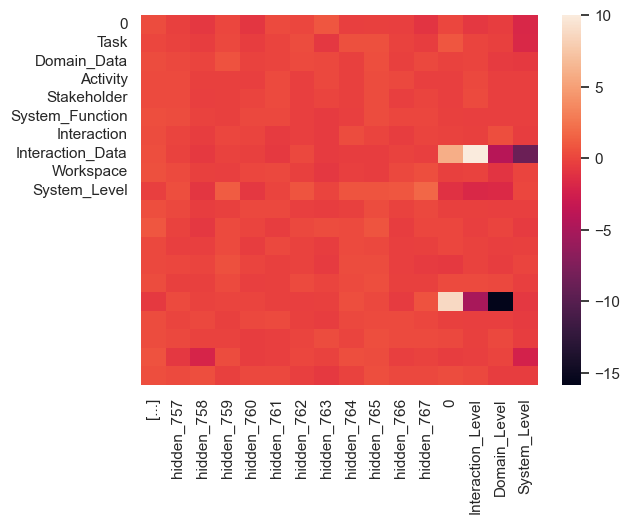

In [7]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="white")

model = StagedBertForTokenClassification.from_pretrained(
    pretrained_model_name_or_path=dst_path.joinpath("./0_model")
)

length = 16
length_onehot = 4
length_hidden = length - length_onehot

hidden_labels = [
    f"hidden_{idx}" for idx in range(772 - length, 772 - length_onehot)
]
hidden_labels[0] = "[...]"
onehot_labels = ["0", "Interaction_Level", "Domain_Level", "System_Level"]

x_labels = hidden_labels + onehot_labels
y_labels = [
    "0",
    "Task",
    "Domain_Data",
    "Activity",
    "Stakeholder",
    "System_Function",
    "Interaction",
    "Interaction_Data",
    "Workspace",
    "System_Level",
]


px = pd.DataFrame(
    model.out_layers[0].weight[:, 772 - length :].detach().numpy()
)

fg = sns.heatmap(
    px,
    xticklabels=x_labels,
    yticklabels=y_labels,
)